# Creating Model for Classifying Mushroom

### **Steps**

#### 1. Preprocessing
#### 2. Model Training 
#### 3. Evaluation
#### 4. Experiment(Finding Best Model)

In [39]:
# importing required packages
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
df = pd.read_csv("data/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

## Preprocessing the data

In [129]:
x = df.drop(columns=['class'], axis=1)
y = df['class']

len(x), len(y)

(8124, 8124)

In [130]:
# Preprocessing Feature Variables 
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)

x = ohe.fit_transform(x)

In [131]:
x.shape

(8124, 117)

In [132]:
# Preprocessing Traget Variable
y = y.map({'e': 0, 'p': 1})
y.shape

(8124,)

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

len(x_train), len(x_test), len(y_train), len(y_test)

(6499, 1625, 6499, 1625)

## Creating & Evaluating Models

In [134]:
# Evaluation Function
def eval_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    F1_Score = f1_score(true, predicted)
    recall = recall_score(true, predicted)
    precision = precision_score(true, predicted)
    return accuracy, F1_Score, recall, precision

In [135]:
models = {
    "Decision_Tree": DecisionTreeClassifier(),
    "Random_Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVC": SVC(),
    "Logistic_Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(),
}

model_list = []
accuracy_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)

    # Making Predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluating train and test data
    train_model_accuracy, train_model_f1, train_model_recall, train_model_precision = eval_model(y_train, y_train_pred)
    test_model_accuracy, test_model_f1, test_model_recall, test_model_precision = eval_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('---Model performance on Training set---')
    print("- Accuracy: {:.4f}".format(train_model_accuracy))
    print("- Recall: {:.4f}".format(train_model_recall))
    print("- Precision: {:.4f}".format(train_model_precision))
    print("- F1 Score: {:.4f}".format(train_model_f1))
    
    print('----------------------------------')
    
    print('---Model performance on Test set---')
    print("- Accuracy: {:.4f}".format(test_model_accuracy))
    print("- Recall: {:.4f}".format(test_model_recall))
    print("- Precision: {:.4f}".format(test_model_precision))
    print("- F1 Score: {:.4f}".format(test_model_f1))
    accuracy_list.append(test_model_accuracy)

    print('='*35)
    print('\n')

Decision_Tree
---Model performance on Training set---
- Accuracy: 1.0000
- Recall: 1.0000
- Precision: 1.0000
- F1 Score: 1.0000
----------------------------------
---Model performance on Test set---
- Accuracy: 1.0000
- Recall: 1.0000
- Precision: 1.0000
- F1 Score: 1.0000


Random_Forest
---Model performance on Training set---
- Accuracy: 1.0000
- Recall: 1.0000
- Precision: 1.0000
- F1 Score: 1.0000
----------------------------------
---Model performance on Test set---
- Accuracy: 1.0000
- Recall: 1.0000
- Precision: 1.0000
- F1 Score: 1.0000


AdaBoost
---Model performance on Training set---
- Accuracy: 1.0000
- Recall: 1.0000
- Precision: 1.0000
- F1 Score: 1.0000
----------------------------------
---Model performance on Test set---
- Accuracy: 1.0000
- Recall: 1.0000
- Precision: 1.0000
- F1 Score: 1.0000


SVC
---Model performance on Training set---
- Accuracy: 1.0000
- Recall: 1.0000
- Precision: 1.0000
- F1 Score: 1.0000
----------------------------------
---Model performance

In [136]:
pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy_Score']).sort_values(by=["Accuracy_Score"],ascending=False)


,Model Name,Accuracy_Score
0,Decision_Tree,1.0
1,Random_Forest,1.0
2,AdaBoost,1.0
3,SVC,1.0
4,Logistic_Regression,1.0
5,XGBoost,1.0


# SupportVectorClassifier

In [137]:
svc_model = SVC()
svc_model = svc_model.fit(x_train, y_train)
y_pred = svc_model.predict(x_test)
score = accuracy_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 100.00


Text(0, 0.5, 'Predicted')

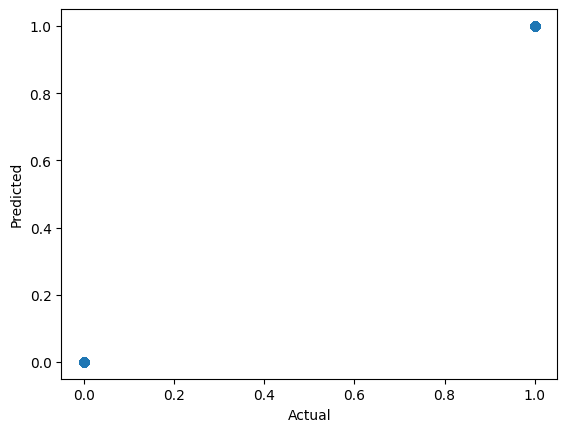

In [138]:
# PLotting the test and predicted results

plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='class'>

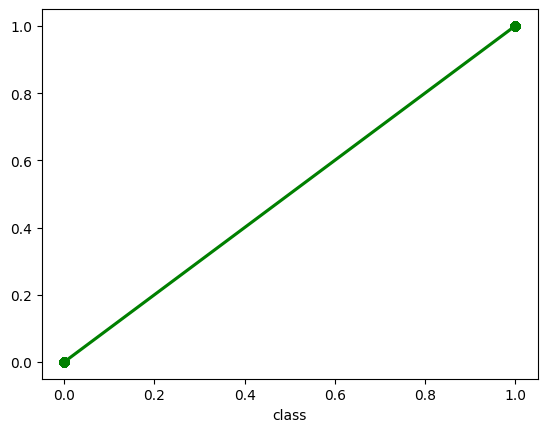

In [139]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='green')